## first lets import the data

In [6]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
from keras.datasets import fashion_mnist
visualize_df = pd.read_csv("./data/fashion-mnist_train.csv")# i started with a dataframe and made the visualization on it but 
                                                            #but then switched to load_data() ,and it's preetier this way
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
visualize_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## lets try to visualize the images

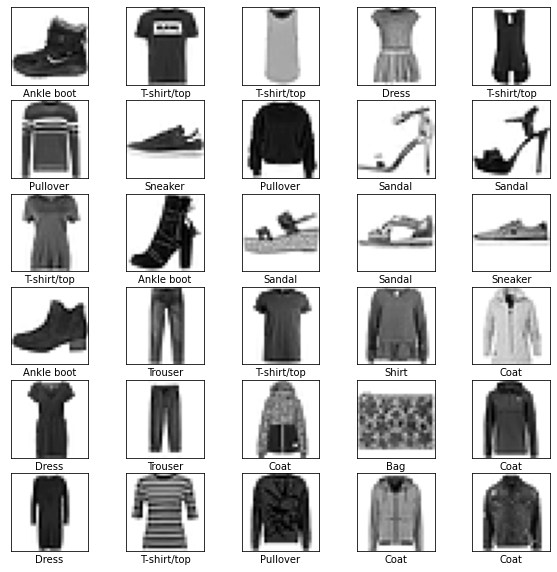

In [8]:
# Manually enter the meaningful name of each label
# Set the figure size
plt.figure(figsize=(10,10))
# Show only the first 30 pictures
for i in range(30):
    plt.subplot(6,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(x_train[i]).reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(label[y_train[i]])

In [19]:
x_train=x_train.reshape(-1,28*28)
x_test=x_test.reshape(-1,28*28)
pca=PCA(n_components=0.85)
x_red=pca.fit_transform(x_train)
x_red_inv=pca.inverse_transform(x_red)
x_test_red=pca.transform(x_test)
x_red.shape

(60000, 43)

# After PCA:

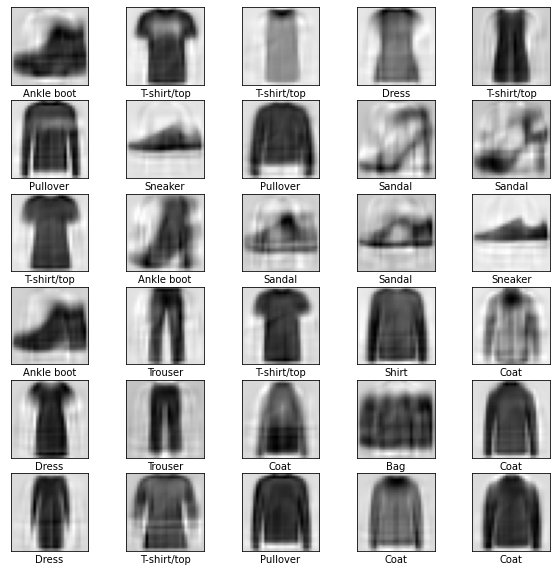

In [20]:
# Set the figure size
plt.figure(figsize=(10,10))
# Show only the first 30 pictures
for i in range(30):
    plt.subplot(6,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(x_red_inv[i]).reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(label[y_train[i]])

## lets show an original vs pca'ed one
## Set the figure size

Text(0.5, 0, '95% Variance Retained')

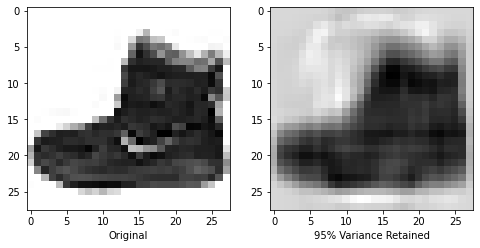

In [21]:

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(np.array(x_train[0]).reshape(28,28), cmap=plt.cm.binary)
plt.xlabel("Original")
plt.subplot(1,2,2)
plt.imshow(np.array(x_red_inv[0]).reshape(28,28), cmap=plt.cm.binary)
plt.xlabel("95% Variance Retained")

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

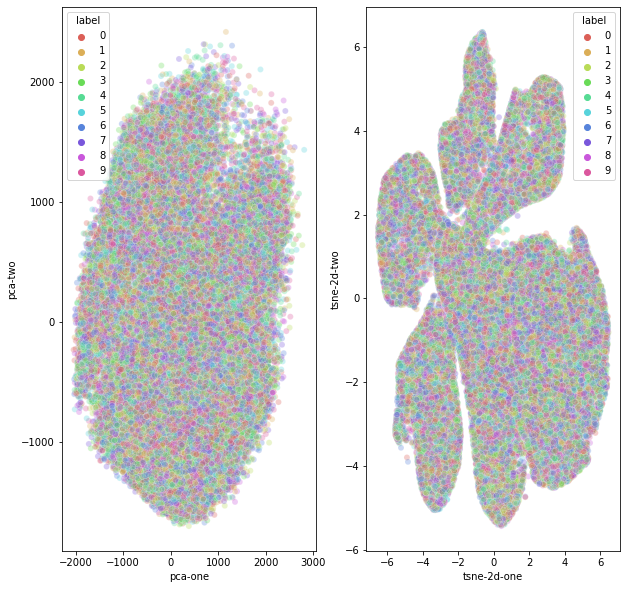

In [23]:
from sklearn.manifold import TSNE
pca_vis=PCA(n_components=3)
pca_result=pca.fit_transform(x_train)
visualize_df['pca-one'] = pca_result[:,0]
visualize_df['pca-two'] = pca_result[:,1] 
visualize_df['pca-three'] = pca_result[:,2]
tsne_results= TSNE(random_state = 42, n_components=2, verbose=0, perplexity=40, n_iter=300).fit_transform(x_red)
visualize_df['tsne-2d-one'] = tsne_results[:,0]
visualize_df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(10,10))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=visualize_df,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=visualize_df,
    legend="full",
    alpha=0.3,
    ax=ax2
)


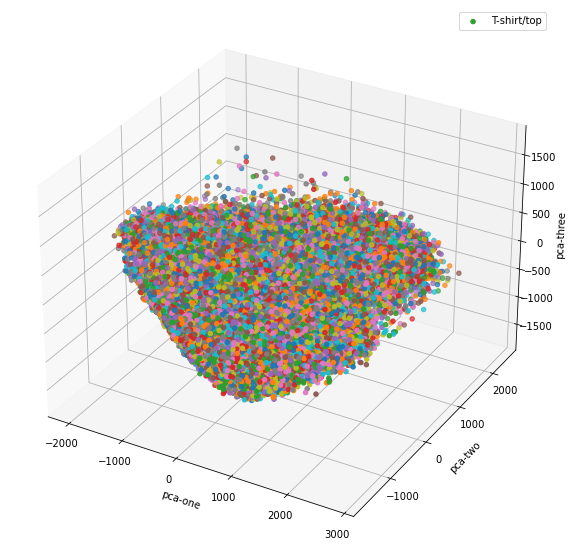

In [24]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=visualize_df["pca-one"], 
    ys=visualize_df["pca-two"], 
    zs=visualize_df["pca-three"], 
    c=visualize_df["label"], 
    cmap='tab10'
)
plt.legend(label)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [25]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
import xgboost as xgb
x_red=StandardScaler().fit_transform(x_red)
x_test_red=StandardScaler().fit_transform(x_test_red)
scores=dict()


# showing some of the GridSearch i've done

In [26]:
# knn_grid={'n_neighbors':[1,3,5,8],'weights':['uniform','distance']}
# knn_gs=GridSearchCV(KNeighborsClassifier(),knn_grid,verbose=3,n_jobs=-1)
# gs_results =knn_gs.fit(x_red,y_train.values.ravel())
# xgb_grid={'n_estimators':[50,100,150],'learning_rate':[0.5,1,1.5]}
# xgb_gs=GridSearchCV(xgb.XGBClassifier(use_label_encoder=False,eval_metric="mlogloss"),xgb_grid,cv=3,
#                     scoring='neg_mean_squared_error',verbose=3,n_jobs=-1)
# gs_results =xgb_gs.fit(x_red,y_train)
# ens_grid={'base_estimator':[LogisticRegression(multi_class='ovr',max_iter=1000),RandomForestClassifier()
#                            ,KNeighborsClassifier(n_neighbors=3,weights='distance')]}
# ada_gs=GridSearchCV(AdaBoostClassifier(),ens_grid,cv=3,
#                      scoring='accuracy',verbose=3,n_jobs=-1)
# gs_results=ada_gs.fit(x_red,y_train)
# rf_grid={'n_estimators':[50,100,200,400,500]}
# rf_gs=GridSearchCV(RandomForestClassifier(oob_score=True),rf_grid,cv=3, scoring='accuracy',verbose=3,n_jobs=-1)
# gs_result=rf_gs.fit(x_red,y_train)

In [ ]:
gs_result.best_estimator_

In [32]:
def stats(model):
    y_pred=model.predict(x_test_red)
    plt.figure(1, figsize= (10,10))
    c_m=confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
    print("Confusion Matrix for KNN")
    sns.heatmap(c_m.T, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()
    plt.close()
    print(classification_report(y_test, y_pred,digits=4))

# KNeigbors

Confusion Matrix for KNN


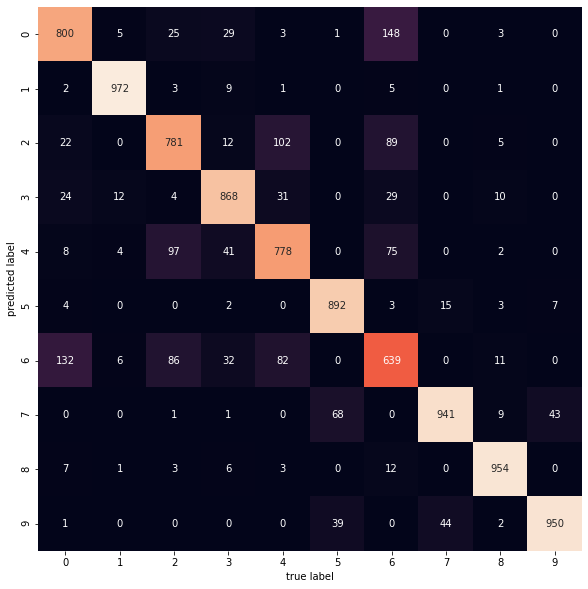

              precision    recall  f1-score   support

           0     0.7890    0.8000    0.7944      1000
           1     0.9789    0.9720    0.9754      1000
           2     0.7725    0.7810    0.7767      1000
           3     0.8875    0.8680    0.8777      1000
           4     0.7741    0.7780    0.7761      1000
           5     0.9633    0.8920    0.9263      1000
           6     0.6468    0.6390    0.6429      1000
           7     0.8852    0.9410    0.9123      1000
           8     0.9675    0.9540    0.9607      1000
           9     0.9170    0.9500    0.9332      1000

    accuracy                         0.8575     10000
   macro avg     0.8582    0.8575    0.8576     10000
weighted avg     0.8582    0.8575    0.8576     10000



In [33]:
knn_clf=KNeighborsClassifier(n_neighbors=3,weights='distance')
knn_clf.fit(x_red,y_train)
#y_pred=knn_clf.predict(x_test_red)
scores["KNN"]=accuracy_score(y_test,y_pred)
stats(knn_clf)

# Random Forest

Confusion Matrix for KNN


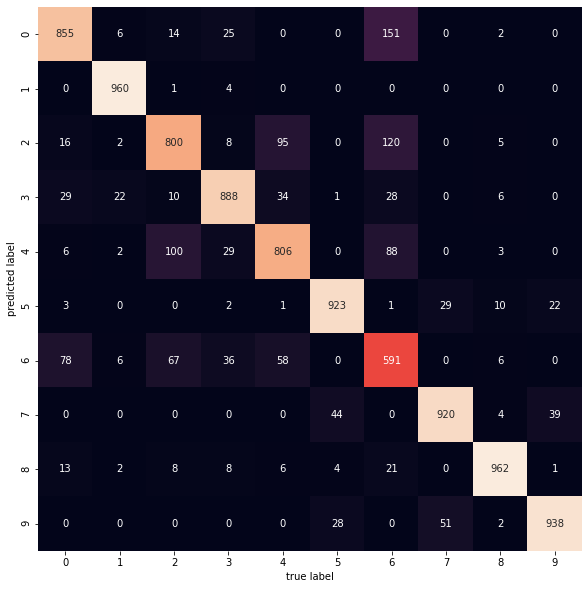

              precision    recall  f1-score   support

           0     0.8120    0.8550    0.8329      1000
           1     0.9948    0.9600    0.9771      1000
           2     0.7648    0.8000    0.7820      1000
           3     0.8723    0.8880    0.8801      1000
           4     0.7795    0.8060    0.7925      1000
           5     0.9314    0.9230    0.9272      1000
           6     0.7019    0.5910    0.6417      1000
           7     0.9136    0.9200    0.9168      1000
           8     0.9385    0.9620    0.9501      1000
           9     0.9205    0.9380    0.9292      1000

    accuracy                         0.8643     10000
   macro avg     0.8629    0.8643    0.8630     10000
weighted avg     0.8629    0.8643    0.8630     10000



In [34]:
rf_clf=RandomForestClassifier(n_estimators=400,oob_score=True)
rf_clf.fit(x_red,y_train)
y_pred=rf_clf.predict(x_test_red)
scores["Random Forest"]=accuracy_score(y_test,y_pred)
stats(rf_clf)


# XGBoost

Confusion Matrix for KNN


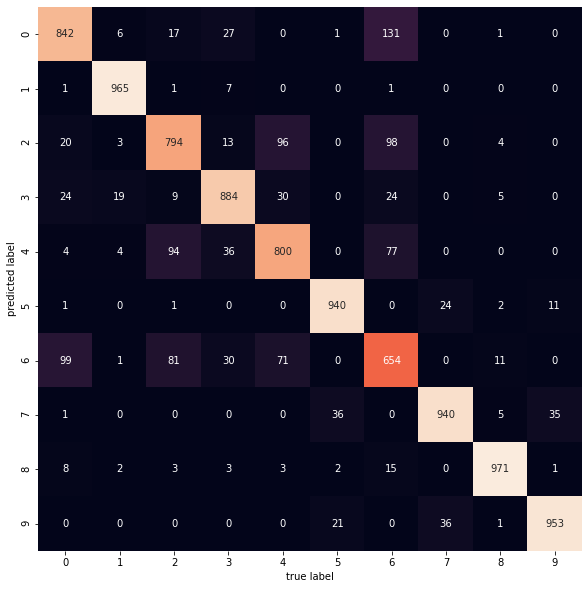

              precision    recall  f1-score   support

           0     0.8215    0.8420    0.8316      1000
           1     0.9897    0.9650    0.9772      1000
           2     0.7724    0.7940    0.7830      1000
           3     0.8884    0.8840    0.8862      1000
           4     0.7882    0.8000    0.7940      1000
           5     0.9602    0.9400    0.9500      1000
           6     0.6906    0.6540    0.6718      1000
           7     0.9243    0.9400    0.9321      1000
           8     0.9633    0.9710    0.9671      1000
           9     0.9426    0.9530    0.9478      1000

    accuracy                         0.8743     10000
   macro avg     0.8741    0.8743    0.8741     10000
weighted avg     0.8741    0.8743    0.8741     10000



In [36]:
xgb_clf=xgb.XGBClassifier(n_estimators=150,learning_rate=0.5,use_label_encoder=False,eval_metric="mlogloss")
xgb_clf.fit(x_red,y_train)
y_pred=xgb_clf.predict(x_test_red)
scores["XGBoost"]=accuracy_score(y_test,y_pred)
stats(xgb_clf)

# AdaBoost

Confusion Matrix for KNN


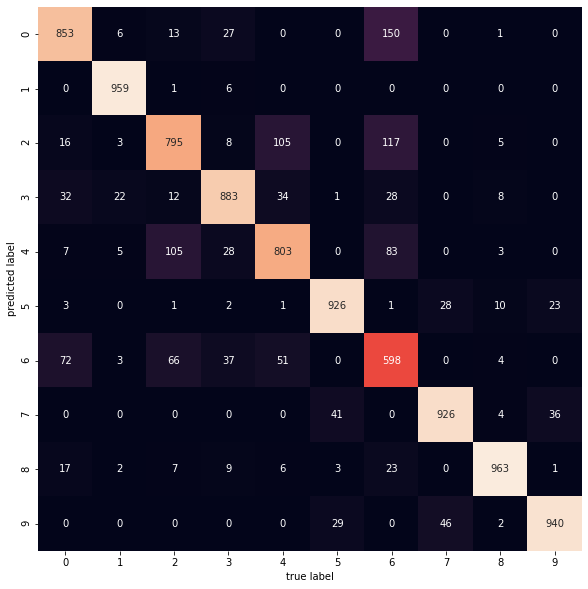

              precision    recall  f1-score   support

           0     0.8124    0.8530    0.8322      1000
           1     0.9928    0.9590    0.9756      1000
           2     0.7579    0.7950    0.7760      1000
           3     0.8657    0.8830    0.8743      1000
           4     0.7766    0.8030    0.7896      1000
           5     0.9307    0.9260    0.9283      1000
           6     0.7196    0.5980    0.6532      1000
           7     0.9196    0.9260    0.9228      1000
           8     0.9340    0.9630    0.9483      1000
           9     0.9243    0.9400    0.9321      1000

    accuracy                         0.8646     10000
   macro avg     0.8633    0.8646    0.8632     10000
weighted avg     0.8633    0.8646    0.8632     10000



In [37]:
ada_clf=AdaBoostClassifier(RandomForestClassifier(n_estimators=400,oob_score=True),learning_rate=0.5,random_state=42)
ada_clf.fit(x_red,y_train)
y_pred=ada_clf.predict(x_test_red)
scores["ADABoost"]=accuracy_score(y_test,y_pred)
stats(ada_clf)

# so im about to fit  a voting classifier
## weird note : i used KMEANS, but it dropped the model to 66%,
## without it , the model is 88% ,but it did make it run faster

Confusion Matrix for KNN


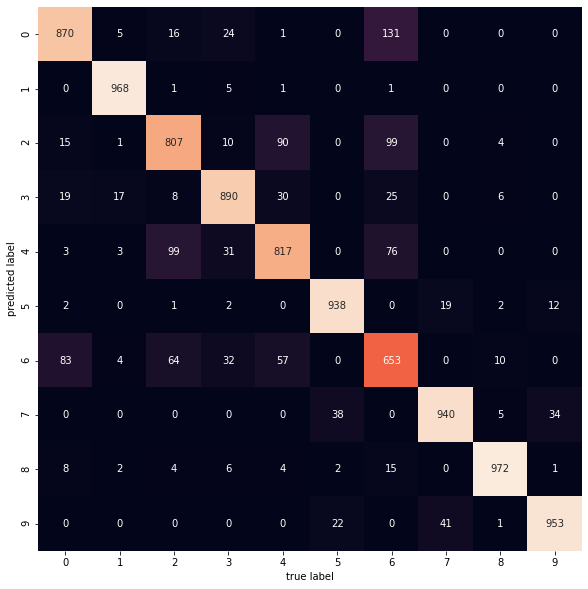

              precision    recall  f1-score   support

           0     0.8309    0.8700    0.8500      1000
           1     0.9918    0.9680    0.9798      1000
           2     0.7865    0.8070    0.7966      1000
           3     0.8945    0.8900    0.8922      1000
           4     0.7940    0.8170    0.8053      1000
           5     0.9611    0.9380    0.9494      1000
           6     0.7231    0.6530    0.6863      1000
           7     0.9243    0.9400    0.9321      1000
           8     0.9586    0.9720    0.9652      1000
           9     0.9371    0.9530    0.9450      1000

    accuracy                         0.8808     10000
   macro avg     0.8802    0.8808    0.8802     10000
weighted avg     0.8802    0.8808    0.8802     10000



In [42]:
from sklearn.model_selection import cross_val_predict
vote_clf =VotingClassifier(estimators=[
            ('knn_bag', BaggingClassifier(knn_clf)),
            ('xgb',xgb_clf),
            ('rf', rf_clf),
            ('ada',AdaBoostClassifier(rf_clf,learning_rate=0.5,random_state=42))
        ], voting='soft', n_jobs=-1,verbose=True)
vote_clf.fit(x_red,y_train)
stats(vote_clf)
scores["Voting"]=accuracy_score(y_test,y_pred)

# Stacking Classifier

Confusion Matrix for KNN


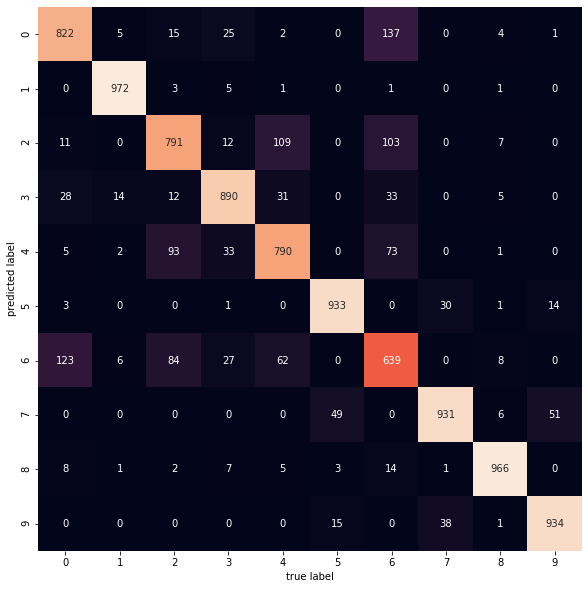

              precision    recall  f1-score   support

           0     0.8131    0.8220    0.8175      1000
           1     0.9888    0.9720    0.9803      1000
           2     0.7657    0.7910    0.7782      1000
           3     0.8786    0.8900    0.8843      1000
           4     0.7924    0.7900    0.7912      1000
           5     0.9501    0.9330    0.9415      1000
           6     0.6733    0.6390    0.6557      1000
           7     0.8978    0.9310    0.9141      1000
           8     0.9593    0.9660    0.9626      1000
           9     0.9453    0.9340    0.9396      1000

    accuracy                         0.8668     10000
   macro avg     0.8664    0.8668    0.8665     10000
weighted avg     0.8664    0.8668    0.8665     10000



In [43]:
stk_clf= StackingClassifier(
        estimators=[
          ('knn_bag', BaggingClassifier(knn_clf)),
          ('ada', ada_clf)],final_estimator=xgb_clf
    , n_jobs=-1)
stk_clf.fit(x_red,y_train)
stats(stk_clf)
scores["Stacking"]=accuracy_score(y_test,y_pred)

In [44]:
scores

{'KNN': 0.8743,
 'Random Forest': 0.8643,
 'XGBoost': 0.8743,
 'ADABoost': 0.8646,
 'Voting': 0.8646,
 'Stacking': 0.8646}